In [25]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Examen

# Mínimos cuadrados

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al realizar el proceso de mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$

In [26]:
# Derivadas parciales
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    c_2 = sum(x**3 for x in xs)
    c_1 = sum(x**2 for x in xs)
    c_0 = sum(xs)
    c_ind = sum(y * x for x, y in zip(xs, ys))

    return (c_2, c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    c_2 = sum(x**2 for x in xs)
    c_1 = sum(xs)
    c_0 = len(xs)
    c_ind = sum(ys)

    return (c_2, c_1, c_0, c_ind)

## Conjunto de datos 1

In [27]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys = [
    -12.7292,
    -7.5775,
    -7.7390,
    -4.1646,
    -4.5382,
    2.2048,
    4.3369,
    2.2227,
    9.0625,
    7.1860,
]

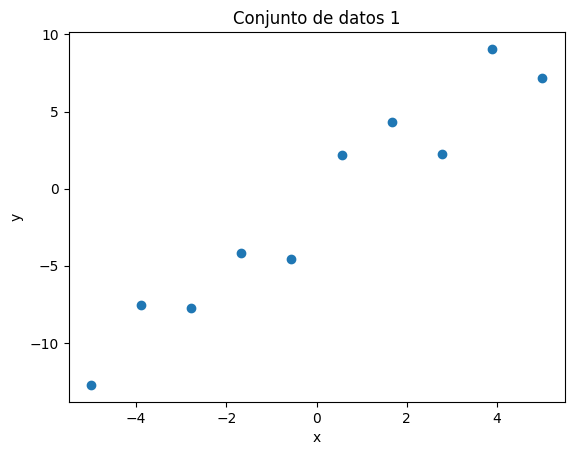

In [28]:
import matplotlib.pyplot as plt

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 1")
plt.show()

In [29]:
%autoreload 2
from src import ajustar_min_cuadrados
pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1, der_parcial_0_exp])
pars # parámetros de la curva ajustada

[07-19 21:55:24][INFO] Se ajustarán 3 parámetros.
[07-19 21:55:24][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01 -1.17356000e+01]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00  2.09874767e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.33267019e+01]]
[07-19 21:55:24][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01 -1.17356000e+01]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00  2.09874767e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.33267019e+01]]


array([-0.04895654,  2.06057364, -0.67492497])

In [30]:
# ####################################################################
def linea(x: float, pars: tuple[float]) -> float:
    """Ecuación de la recta y = a1 * x + a0.

    ## Parameters

    ``x``: valor de x.

    ``pars``: parámetros de la recta. Deben ser de la forma (a1, a0).

    ## Return

    ``y``: valor de y.

    """
    a2, a1, a0 = pars
    return a1 * x + a0

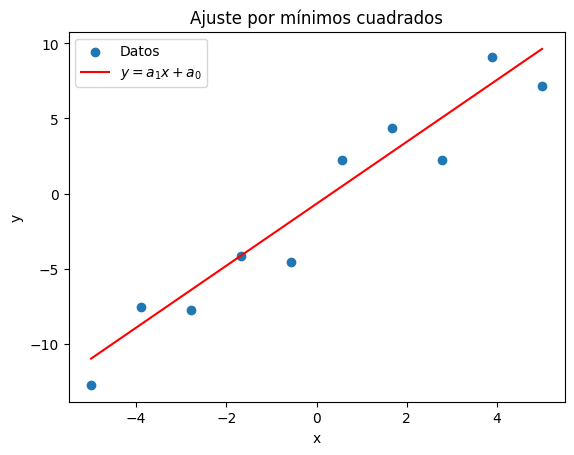

In [31]:
import numpy as np

x = np.linspace(-5, 5, 100)
y = [linea(xi, pars) for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()

## Conjunto de datos 2

In [32]:
xs2 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys2 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

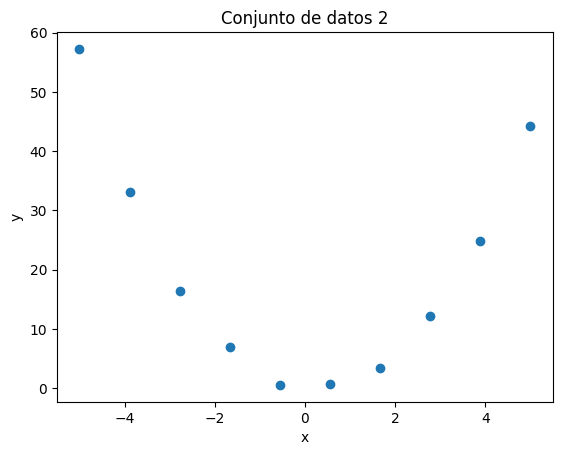

In [33]:
plt.scatter(xs2, ys2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 2")
plt.show()

Al utilizar el método de mínimos cuadrados con una función lineal se obtienen malos resultados.

[07-19 21:55:25][INFO] Se ajustarán 3 parámetros.
[07-19 21:55:25][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[07-19 21:55:25][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]


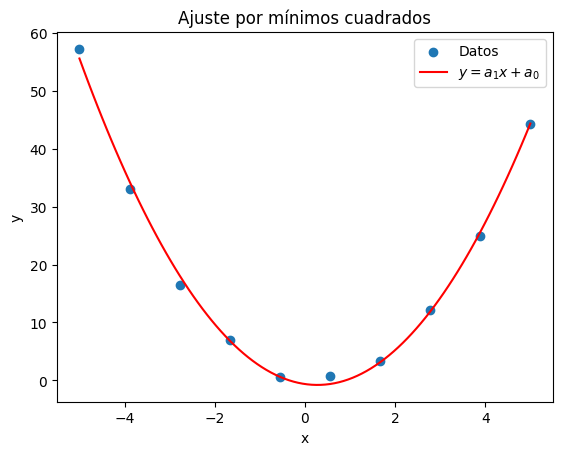

In [34]:
import numpy as np

x = np.linspace(-5, 5, 100)

pars = ajustar_min_cuadrados(xs2, ys2, gradiente=[der_parcial_0, der_parcial_1, der_parcial_0_exp])

y = [cuadratica(xi, pars) for xi in x]

plt.scatter(xs2, ys2, label="Datos")
plt.plot(x, y, color="RED", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()

# Indicaciones
Su trabajo es ajustar el código para utilizar una función cuadrática que aproxime los puntos. Tenga en cuenta las siguientes consideraciones:
* Usar el método de mínimos cuadrados para interpolar los puntos.
* Graficar la función cuadrática y los puntos dados.
* Listar los cambios realizados.
* Modificar y utilizar SOLO el código provisto. No se aceptarán la utilización de otras librerías o funciones.

In [35]:
# ####################################################################
def der_parcial_0_exp(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_2 = sum(x**4 for x in xs)
    c_1 = sum(x**3 for x in xs)
    c_0 = sum(x**2 for x in xs)
    c_ind = sum(y * x**2 for x, y in zip(xs, ys))

    return (c_2, c_1, c_0, c_ind)

def cuadratica(x: float, pars: tuple[float]) -> float:
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

Su gráfico debe ser similar a:
![alt text](<assets/2do orden.jpg>)